In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv('/content/dementia_patients_health_data.csv')

In [5]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [6]:
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [7]:
df.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

In [8]:
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions      0
Dementia                       0
dtype: int64

In [11]:
# Removing null values
PrescriptionMissValue = df['Prescription'].mode()[0]
df['Prescription'].fillna(PrescriptionMissValue, inplace=True)
DosageinmgMissValues=df['Dosage in mg'].mean()
df['Dosage in mg'].fillna(DosageinmgMissValues, inplace=True)
ChronicMissValue = df['Chronic_Health_Conditions'].mode()[0]
df['Chronic_Health_Conditions'].fillna(PrescriptionMissValue, inplace=True)

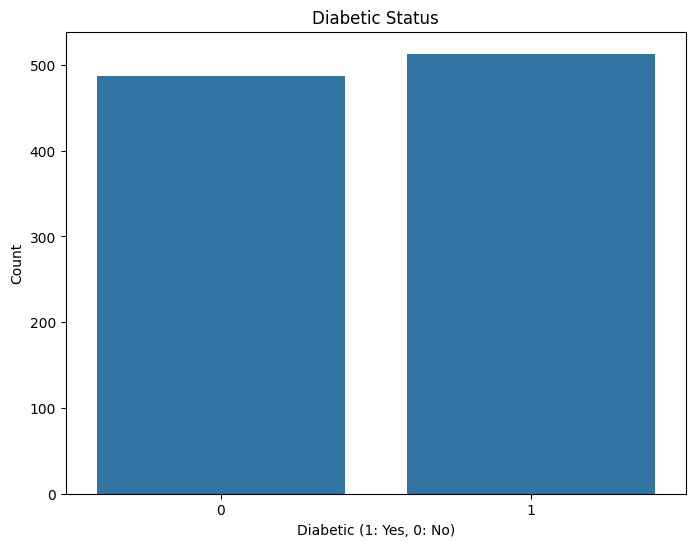

In [12]:
#Statistical analysis
# 1. Bar plot for 'Diabetic'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetic', data=df)
plt.title('Diabetic Status')
plt.xlabel('Diabetic (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

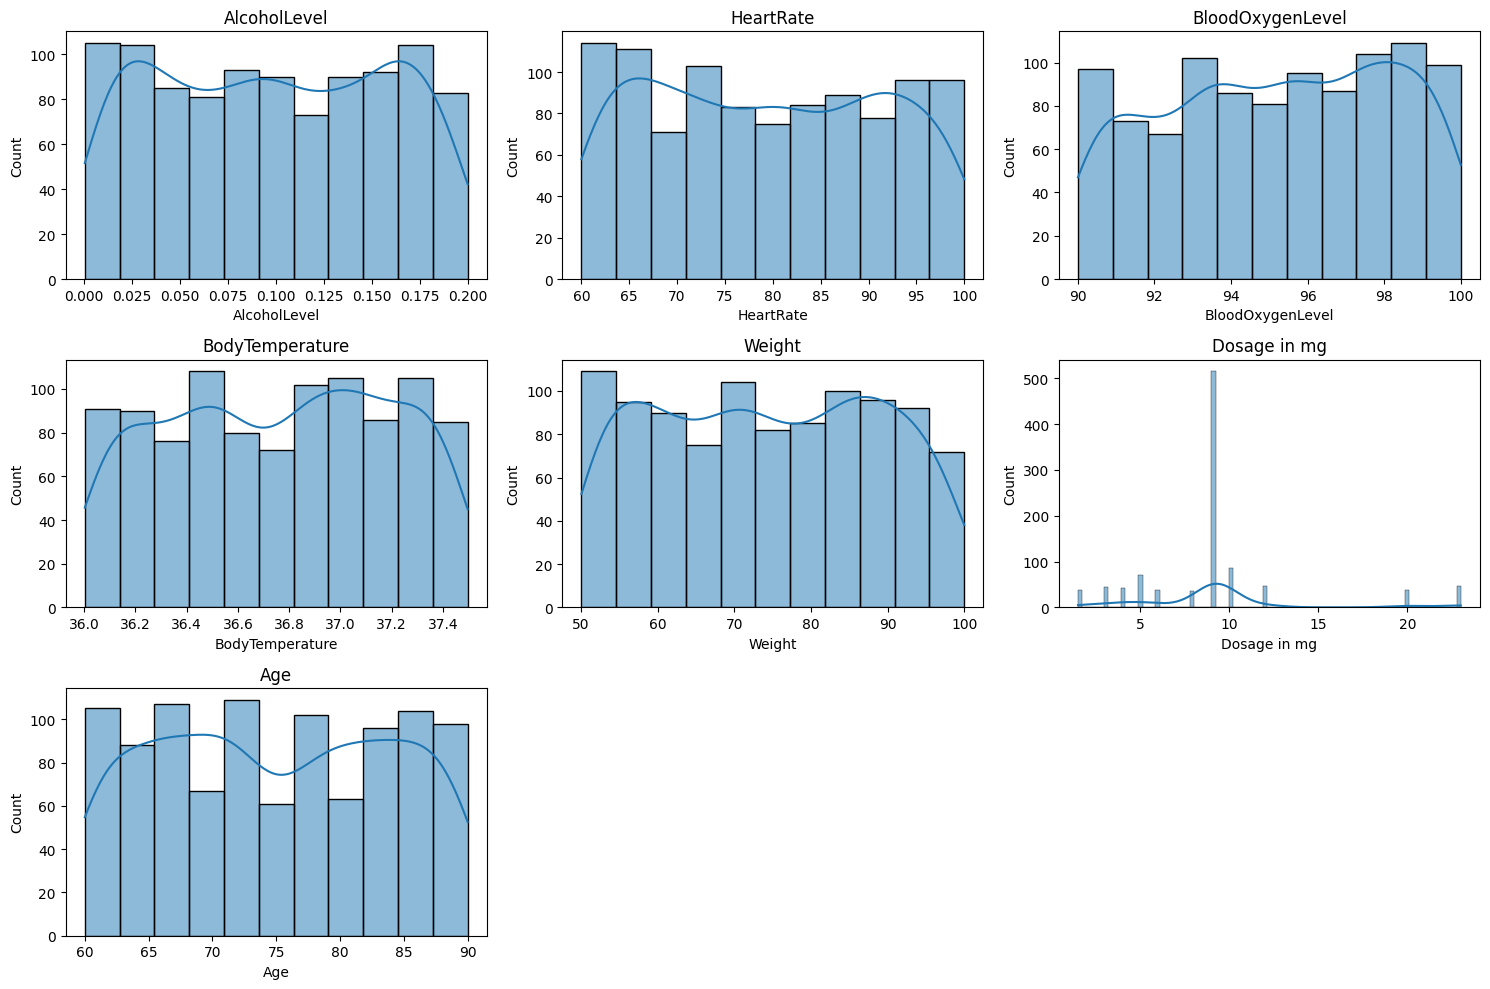

In [13]:
# 2. Histograms for continuous variables
continuous_vars = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Dosage in mg', 'Age']
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

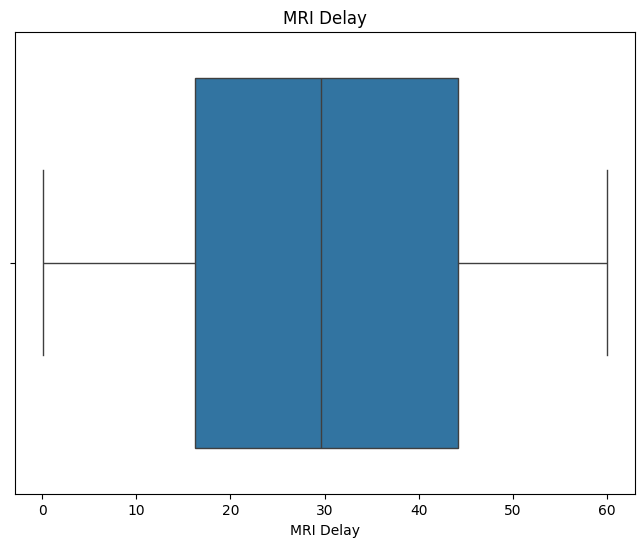

In [14]:
# 3. Box plot for 'MRI_Delay'
plt.figure(figsize=(8, 6))
sns.boxplot(x='MRI_Delay', data=df)
plt.title('MRI Delay')
plt.xlabel('MRI Delay')
plt.show()

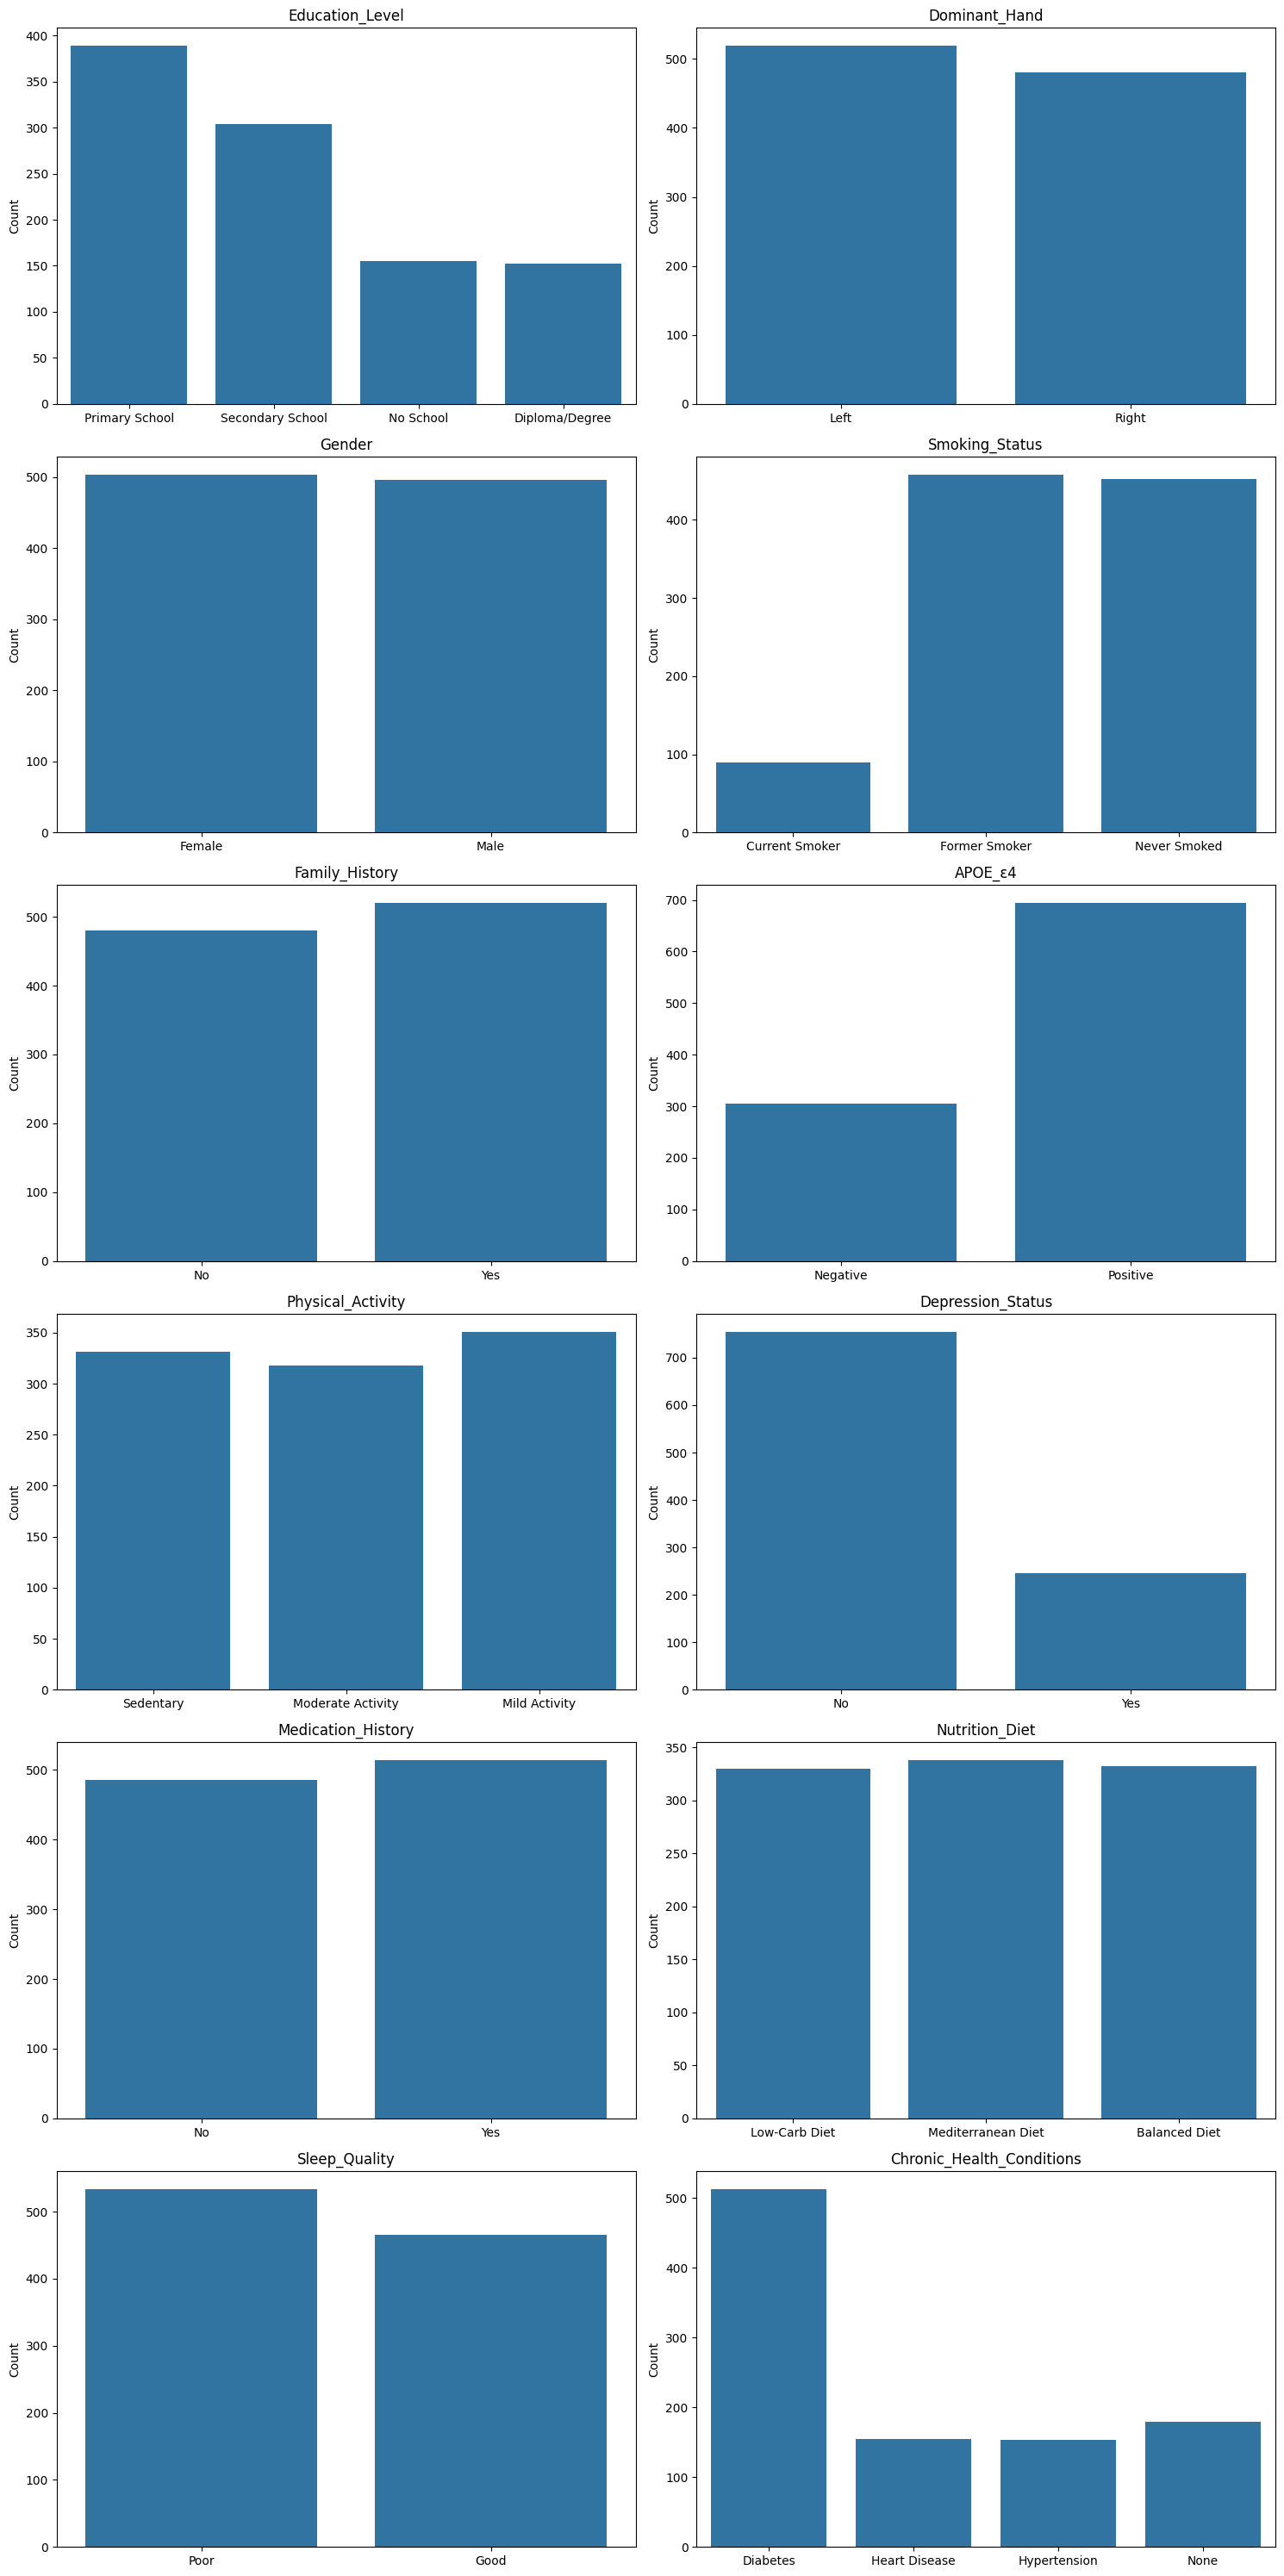

In [15]:
# 4. Bar plots for categorical variables
categorical_vars = ['Education_Level', 'Dominant_Hand', 'Gender', 'Smoking_Status', 'Family_History', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']
plt.figure(figsize=(15, 30))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=var, data=df)
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

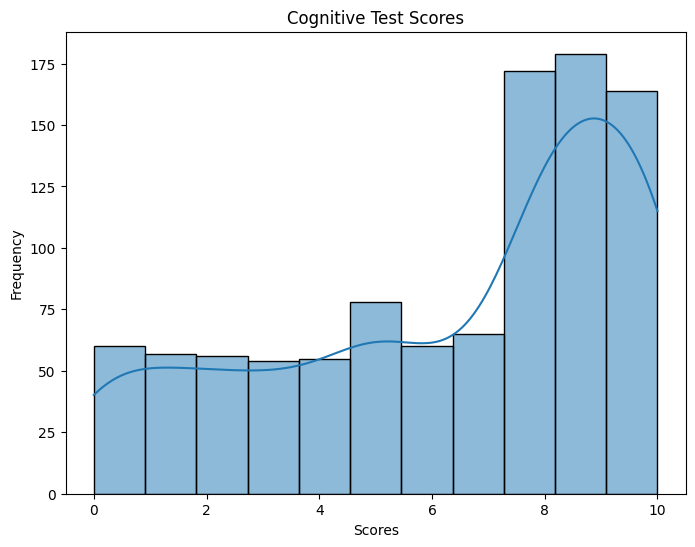

In [16]:
# 5. Histogram for 'Cognitive_Test_Scores'
plt.figure(figsize=(8, 6))
sns.histplot(df['Cognitive_Test_Scores'], kde=True)
plt.title('Cognitive Test Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


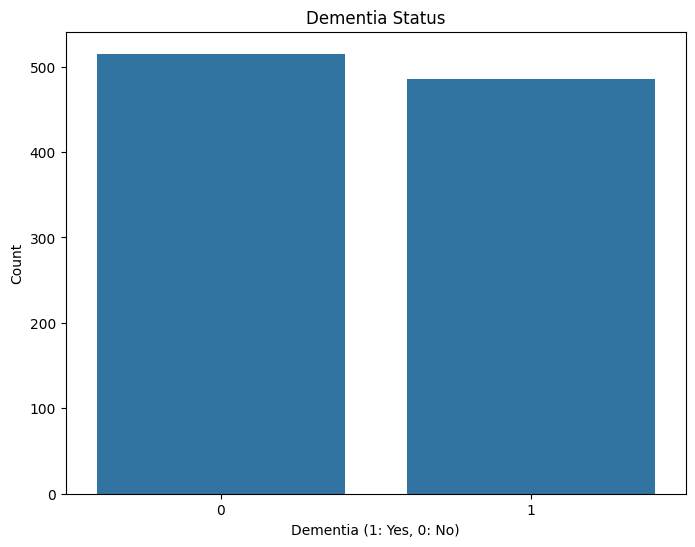

In [17]:
# 6. Bar plot for 'Dementia'
plt.figure(figsize=(8, 6))
sns.countplot(x='Dementia', data=df)
plt.title('Dementia Status')
plt.xlabel('Dementia (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [18]:
#Converting Categorical Columns
data2 = df
label_encoder=preprocessing.LabelEncoder()
colToEncode = ["Prescription","Education_Level","Dominant_Hand", "Gender", "Family_History", "Smoking_Status", "APOE_ε4", "Medication_History", "Nutrition_Diet", "Sleep_Quality", "Chronic_Health_Conditions", "Physical_Activity", "Depression_Status"]
for i in colToEncode:
    data2[i] = label_encoder.fit_transform(df[i])

In [19]:
#Creating Correlation Matrix
df.corr()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
Diabetic,1.000000,-0.025616,-0.007188,-0.016575,-0.053851,-0.007501,-0.020378,-0.029919,2.458726e-02,0.000923,...,0.013401,0.025953,-0.006640,0.015421,-0.050019,-0.006733,0.009586,-0.055916,-0.871307,4.481531e-02
AlcoholLevel,-0.025616,1.000000,-0.046341,-0.005562,0.030854,0.034553,0.004160,0.011165,1.564486e-02,-0.003081,...,0.016359,0.033830,0.026795,-0.002874,-0.018716,-0.058951,-0.002473,0.033801,0.066178,-3.720428e-03
HeartRate,-0.007188,-0.046341,1.000000,0.022283,0.015585,-0.001730,0.000169,-0.007336,-4.114936e-02,0.011665,...,-0.007302,0.061900,0.006472,-0.003235,0.005493,0.027799,0.049843,0.003392,0.010527,1.227590e-02
BloodOxygenLevel,-0.016575,-0.005562,0.022283,1.000000,-0.007265,-0.041081,-0.005760,0.019735,-1.615516e-02,0.029565,...,-0.028457,-0.008023,-0.057923,-0.046504,0.070218,0.015129,0.009316,0.017862,0.025110,-7.145418e-02
BodyTemperature,-0.053851,0.030854,0.015585,-0.007265,1.000000,-0.017750,0.015953,-0.041416,3.004309e-02,0.001586,...,-0.008126,0.061852,-0.005957,0.022563,-0.009791,0.022006,-0.030964,0.011410,0.052163,3.392768e-02
Weight,-0.007501,0.034553,-0.001730,-0.041081,-0.017750,1.000000,-0.022890,-0.007627,8.756674e-03,0.011739,...,-0.010713,-0.080600,0.022822,-0.032482,0.035821,-0.057993,0.023790,0.005504,0.004676,-4.956289e-02
MRI_Delay,-0.020378,0.004160,0.000169,-0.005760,0.015953,-0.022890,1.000000,0.007715,-8.315304e-02,-0.002093,...,0.019007,-0.014357,-0.025660,0.052370,-0.052227,0.038864,-0.002350,0.002877,-0.013202,3.125126e-02
Prescription,-0.029919,0.011165,-0.007336,0.019735,-0.041416,-0.007627,0.007715,1.000000,-4.616006e-01,0.001600,...,-0.060376,-0.159744,0.009613,-0.180355,0.257445,0.030580,-0.043615,0.042246,0.010122,-2.983278e-01
Dosage in mg,0.024587,0.015645,-0.041149,-0.016155,0.030043,0.008757,-0.083153,-0.461601,1.000000e+00,-0.008687,...,-0.029774,0.008248,-0.000577,-0.014043,-0.024458,-0.042105,-0.012225,0.001847,-0.022868,6.295735e-17
Age,0.000923,-0.003081,0.011665,0.029565,0.001586,0.011739,-0.002093,0.001600,-8.686705e-03,1.000000,...,-0.016421,-0.017701,0.021607,-0.018278,0.062640,-0.050559,0.085684,0.003336,0.016920,-6.215424e-02


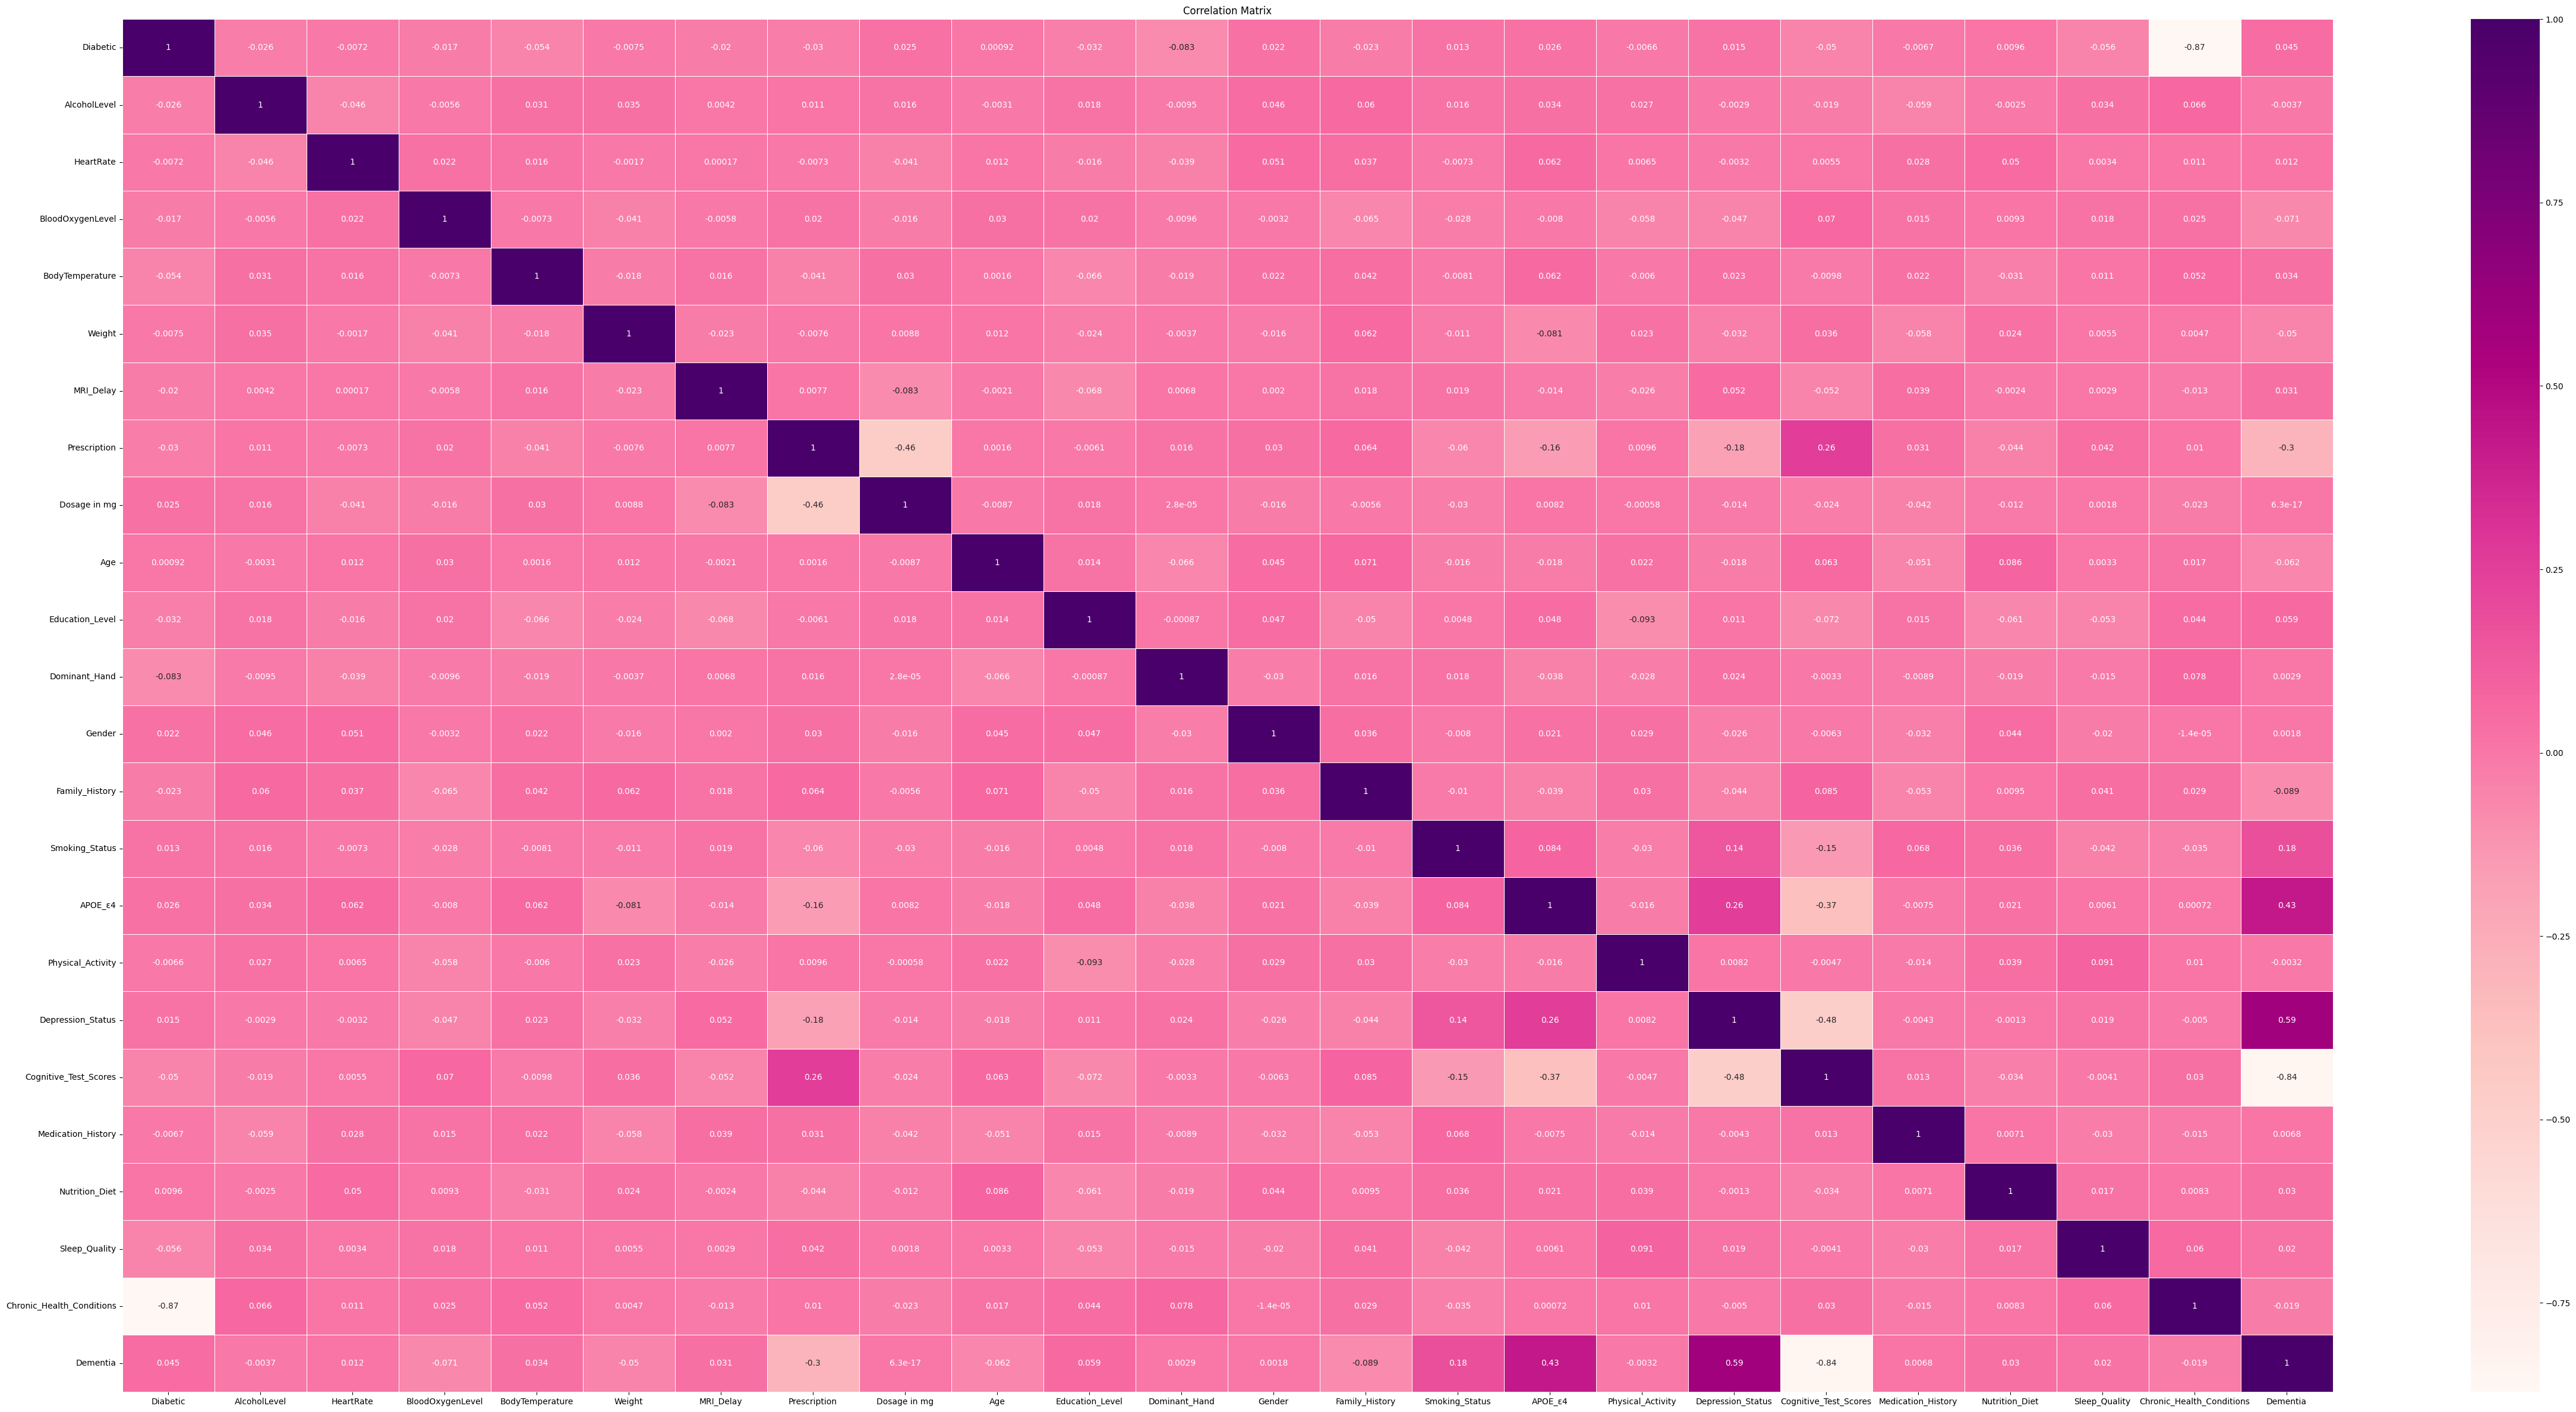

In [20]:
#Correlation Matrix Heatmap
CorrelationMatrix=df.corr()
plt.figure(figsize=(60,30))
sns.heatmap(CorrelationMatrix, annot=True, cmap='RdPu', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
#Machine Learning Model
# Features and target variable
X = df[['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature',
          'Weight', 'MRI_Delay', 'Prescription', 'Dosage in mg', 'Age',
          'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
          'Depression_Status', 'Medication_History', 'Nutrition_Diet',
          'Sleep_Quality', 'Chronic_Health_Conditions']]
y = df['Dementia']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
#Different Machine Learning Models & There Accuracy
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("="*50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        94
           1       0.86      0.75      0.80       106

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200

Classifier: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
